In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####Data Cleaning

In [ ]:
df_dice=pd.read_csv('/content/gdrive/MyDrive/CSC494/nnunet_task_80_dice_multilabel.csv')
df_baseline=pd.read_csv('/content/gdrive/MyDrive/CSC494/metrics_baseline.csv')

In [ ]:
df_image_dsc = pd.read_csv('/content/gdrive/MyDrive/CSC494/image_dsc.csv')

In [ ]:
df_dice = df_dice.loc[df_dice['image_id'] != 'gyn_0131']

In [ ]:
df_baseline['image_id'] = df_baseline['imageID'].str[:-7]

In [ ]:
df_image_dsc['diff'] = df_image_dsc['volume_dice']-df_image_dsc['dice']

In [ ]:
df_baseline.groupby('image_id').mean()

,Unnamed: 0,class,volume_dice,hd_dist_95,surface_dice,apl,Unnamed: 7,Unnamed: 8,Unnamed: 9
image_id,,,,,,,,,
gyn_0120,45.5,2.5,0.795154,9.571977,0.642078,15982.50,NaN,NaN,NaN
gyn_0121,33.5,2.5,0.769922,15.518002,0.625903,17490.25,NaN,NaN,NaN
gyn_0122,37.5,2.5,0.826143,7.183716,0.601526,27231.25,NaN,NaN,NaN
gyn_0123,29.5,2.5,0.874190,5.761853,0.710547,18905.00,NaN,NaN,NaN
gyn_0124,5.5,2.5,0.842278,5.563750,0.613262,23027.75,NaN,NaN,NaN
gyn_0125,1.5,2.5,0.844817,18.559080,0.718235,10798.25,NaN,NaN,NaN
gyn_0126,25.5,2.5,0.871875,8.867243,0.726920,16057.75,NaN,NaN,NaN
gyn_0127,9.5,2.5,0.898254,8.111726,0.756034,12962.50,NaN,NaN,NaN
gyn_0128,21.5,2.5,0.732478,14.431554,0.651755,8410.00,NaN,NaN,NaN


In [ ]:
df_baseline['label'] = df_baseline['class']

In [ ]:
df_baseline_clean = df_baseline[['label','volume_dice', 'image_id']]

In [ ]:
df_baseline_clean['model'] = 'nn_Unet'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_baseline_clean['transform'] = 'clean'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_baseline_clean['severity'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_baseline_clean.rename( columns={'volume_dice': 'dice' } ,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_robustness = pd.concat([df_baseline_clean, df_dice[['label','dice','image_id','model','transform','severity']]])

In [ ]:
df_robustness.to_csv("/content/gdrive/MyDrive/CSC494/robustness_raw.csv")

In [ ]:
# df_dice_baseline_1 = df_baseline.loc[df_baseline['label'] == 1]
# df_dice_baseline_2 = df_baseline.loc[df_baseline['label'] == 2]
# df_dice_baseline_3 = df_baseline.loc[df_baseline['label'] == 3]
# df_dice_baseline_4 = df_baseline.loc[df_baseline['label'] == 4]

In [ ]:
df_dice

,Unnamed: 0,model,transform,severity,label,image_id,dice
0,0,nn_Unet,Affine,1,1,gyn_0120,0.805366
1,1,nn_Unet,Affine,1,2,gyn_0120,0.115910
2,2,nn_Unet,Affine,1,3,gyn_0120,0.259626
3,3,nn_Unet,Affine,1,4,gyn_0120,0.437674
4,4,nn_Unet,Affine,1,1,gyn_0121,0.688565
...,...,...,...,...,...,...,...
2391,2391,nn_Unet,Smoothing,5,4,gyn_0129,0.485479
2392,2392,nn_Unet,Smoothing,5,1,gyn_0130,0.801934
2393,2393,nn_Unet,Smoothing,5,2,gyn_0130,0.708100
2394,2394,nn_Unet,Smoothing,5,3,gyn_0130,0.584161


In [ ]:
df1 = df_dice.merge(df_baseline, on = ['image_id', 'label'])

In [ ]:
df1.rename( columns={'volume_dice': 'baseline_dice' } ,inplace=True)

###Plot Set Up

In [18]:
np.random.seed(19680801)

N = 90
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

In [19]:
sns.set(rc = {'figure.figsize':(12,8)})

In [20]:
sns.set_style("darkgrid")

In [21]:
sns.set_color_codes(palette = "pastel")

# Plots

In [ ]:
df1

,Unnamed: 0_x,model,transform,severity,label,image_id,dice,Unnamed: 0_y,imageID,class,...,surface_dice,apl,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,nn_Unet,Affine,1,1,gyn_0120,0.805366,44,gyn_0120.nii.gz,1,...,0.799548,15981,NaN,NaN,NaN,mean,volume_dice,hd_dist_95,surface_dice,apl
1,48,nn_Unet,Affine,2,1,gyn_0120,0.497444,44,gyn_0120.nii.gz,1,...,0.799548,15981,NaN,NaN,NaN,mean,volume_dice,hd_dist_95,surface_dice,apl
2,96,nn_Unet,Affine,3,1,gyn_0120,0.590345,44,gyn_0120.nii.gz,1,...,0.799548,15981,NaN,NaN,NaN,mean,volume_dice,hd_dist_95,surface_dice,apl
3,144,nn_Unet,Affine,4,1,gyn_0120,0.200635,44,gyn_0120.nii.gz,1,...,0.799548,15981,NaN,NaN,NaN,mean,volume_dice,hd_dist_95,surface_dice,apl
4,192,nn_Unet,Affine,5,1,gyn_0120,0.000259,44,gyn_0120.nii.gz,1,...,0.799548,15981,NaN,NaN,NaN,mean,volume_dice,hd_dist_95,surface_dice,apl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2203,nn_Unet,Smoothing,1,4,gyn_0130,0.774447,43,gyn_0130.nii.gz,4,...,0.355735,32037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,2251,nn_Unet,Smoothing,2,4,gyn_0130,0.743626,43,gyn_0130.nii.gz,4,...,0.355735,32037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,2299,nn_Unet,Smoothing,3,4,gyn_0130,0.631508,43,gyn_0130.nii.gz,4,...,0.355735,32037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2198,2347,nn_Unet,Smoothing,4,4,gyn_0130,0.517675,43,gyn_0130.nii.gz,4,...,0.355735,32037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## plotting

In [ ]:
# 'Affine', 'AnisoDownsample', 'BiasField', 'ContrastCompression',
#        'ContrastExpansion', 'ElasticDeformation', 'Ghosting',
#        'RandomMotion', 'RicianNoise', 'Smoothing']

In [ ]:
transform = 'Affine'
df1_ = df1.loc[df1['transform'] == transform]
df1_mean = df1_.groupby(['severity','label']).mean()

In [ ]:
df1_mean = df1_mean.replace({1: 'Bladder', 2: 'Rectum',3: 'Sigmoid', 4: 'Small Bowel'}) 

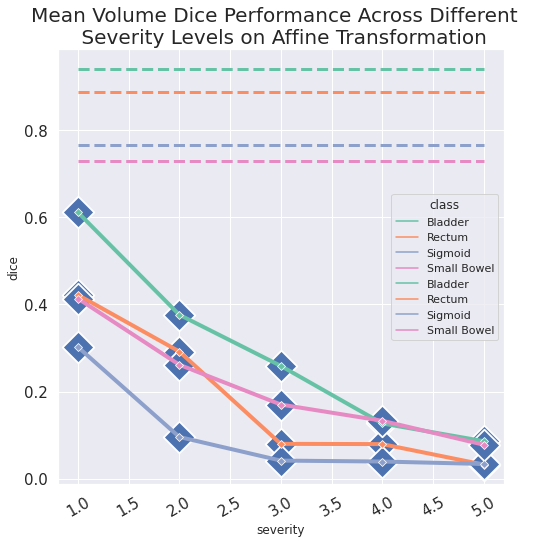

In [ ]:
plt.figure()
sns.lineplot(x = 'severity', y = 'dice', hue = 'class', data = df1_mean, marker="D", linewidth = 4,  palette = "Set2")
sns.scatterplot(x = 'severity', y = 'dice',  data = df1_mean, marker="D",s=500, color = 'b')
sns.lineplot(x = 'severity', y = 'baseline_dice', hue = 'class', data = df1_mean,  linestyle='--',linewidth = 3,  palette = "Set2")
plt.xticks(rotation=30, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Mean Volume Dice Performance Across Different  \n Severity Levels on '+transform+' Transformation', fontsize=20)
# plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

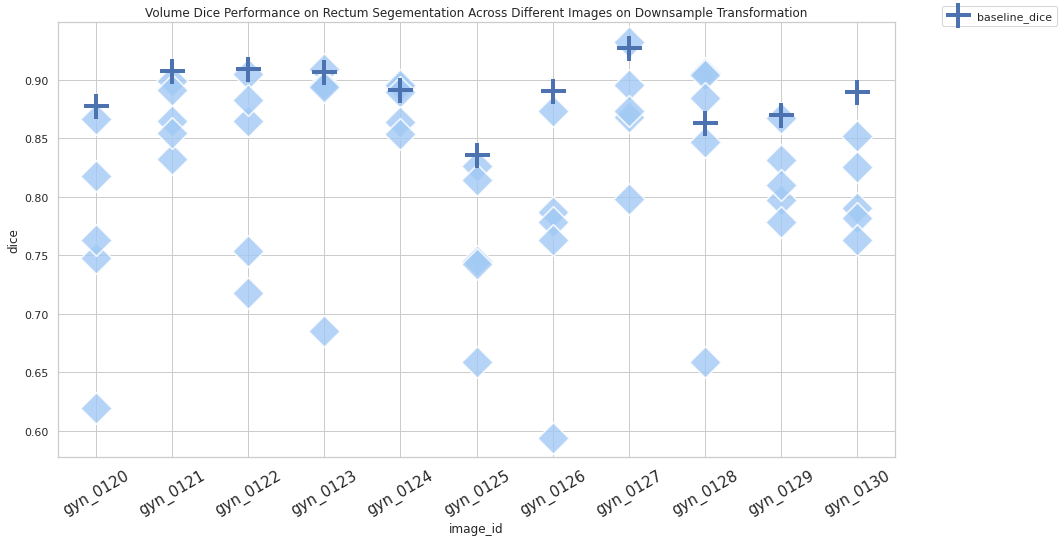

In [ ]:
# sns.scatterplot(x = 'image_id', y = 'dice', data = df1_, marker="D",s=500,  alpha = 0.8, color = 'b')
# plt.plot('image_id', 'baseline_dice', data = df1_, marker = '+',markersize=25, mew=4, LineStyle = 'none' )
# plt.xticks(rotation=30, fontsize = 15)
# plt.title('Volume Dice Performance on Across Different Images on Downsample Transformation')
# plt.legend(bbox_to_anchor=(1.2, 1.05))
# plt.show()

In [ ]:
sns.barplot(x = 'image_id', y = 'diff', data = df_image_dsc, color = 'b')
plt.xticks(rotation=30, fontsize = 15)
plt.title('Difference in Mean Volume Dice and Baseline Volume Dice', fontsize=20)
plt.show()

In [12]:
df = pd.read_csv('/content/gdrive/MyDrive/CSC494/transform_level_metrics - transform_level_metrics.csv')

In [13]:
df.head()

,label,model,transform,Overall_dice_mean,Overall_dics_std,Degradation_dice_mean,Degradation_dice_std
0,1,nn_Unet,AnisoDownsample,0.927345,0.056527,0.017143,0.011226
1,1,nn_Unet,BiasField,0.929689,0.059251,0.013449,0.015518
2,1,nn_Unet,ContrastCompression,0.938782,0.051003,-0.000881,0.002521
3,1,nn_Unet,ContrastExpansion,0.930747,0.050736,0.011782,0.002100
4,1,nn_Unet,ElasticDeformation,0.858431,0.071265,0.125739,0.034450


In [34]:
df_temp = df.loc[df['label'] == 4]

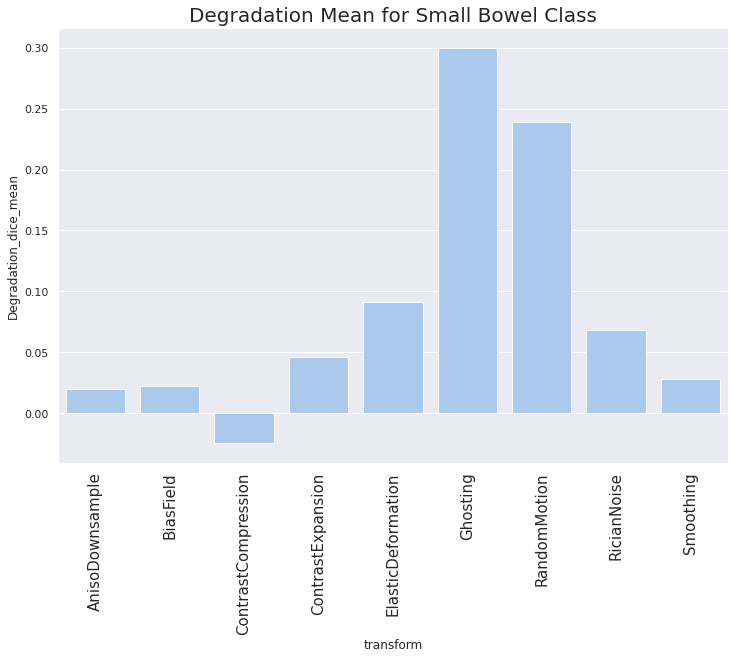

In [35]:
sns.barplot(x = 'transform', y = 'Degradation_dice_mean', data = df_temp, color = 'b', ci = None)
plt.xticks(rotation=90, fontsize = 15)
plt.title('Degradation Mean for Small Bowel Class', fontsize=20)
plt.show()